Name: Muhammad Faizan

Student Number: ETU20242067

In [250]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings


In [252]:
# a) Import the Adidas US Sales Dataset into a Jupyter Notebook as df 
df = pd.read_excel(r"C:\Users\DELL\Desktop\Final Data Science\Adidas_US_Sales_Dataset.xlsx")

In [253]:
# b) Display a summary of the dataset 
print("Dataset Summary:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\nData types of each column:")
print(df.dtypes)
print("\nNumber of missing values per column:")
print(df.isnull().sum())

Dataset Summary:
Number of rows: 9648
Number of columns: 13

Data types of each column:
Retailer                    object
Retailer ID                  int64
Invoice Date        datetime64[ns]
Region                      object
State                       object
City                        object
Product                     object
Price per Unit             float64
Units Sold                 float64
Total Sales                float64
Operating Profit           float64
Operating Margin           float64
Sales Method                object
dtype: object

Number of missing values per column:
Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      5
Units Sold          1
Total Sales         3
Operating Profit    2
Operating Margin    3
Sales Method        6
dtype: int64


In [254]:
# c) Clean the dataset following these conditions:

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Replace missing values in numerical columns with median by Product
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df.groupby('Product')[col].transform(lambda x: x.fillna(x.median()))

# Replace missing values in categorical columns with mode by Product
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df.groupby('Product')[col].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))


In [255]:
# Check for and remove duplicate rows
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates()

# Verify cleaning
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Number of duplicate rows: 0

Missing values after cleaning:
Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64


In [258]:
# 1) Find the minimum Operating Margin and Operating Profit per Region and Sales Method
min_margin_profit = df.groupby(['Region', 'Sales Method'])[['Operating Margin', 'Operating Profit']].min()
print("\nMinimum Operating Margin and Operating Profit per Region and Sales Method:")
print(min_margin_profit)


Minimum Operating Margin and Operating Profit per Region and Sales Method:
                        Operating Margin  Operating Profit
Region    Sales Method                                    
Midwest   In-store                  0.30           3062.50
          Online                    0.30              0.00
          Outlet                    0.25              0.00
Northeast In-store                  0.25           2625.00
          Online                    0.33             93.38
          Outlet                    0.20             75.20
South     In-store                  0.35          35437.50
          Online                    0.25            271.89
          Outlet                    0.20            217.58
Southeast In-store                  0.20          10500.00
          Online                    0.25            339.30
          Outlet                    0.20            508.95
West      In-store                  0.15          12250.00
          Online                    0.2

In [259]:
# 2) Print the most sold Product per Region based on Units Sold
print("\nMost sold Product per Region based on Units Sold:")
for region in df['Region'].unique():
    region_data = df[df['Region'] == region]
    most_sold = region_data.groupby('Product')['Units Sold'].sum().idxmax()
    total_units = region_data.groupby('Product')['Units Sold'].sum().max()
    print(f"Region: {region}, Product: {most_sold}, Units Sold: {total_units}")


Most sold Product per Region based on Units Sold:
Region: Northeast, Product: Men's Street Footwear, Units Sold: 134252.0
Region: South, Product: Men's Street Footwear, Units Sold: 106545.0
Region: West, Product: Men's Street Footwear, Units Sold: 150795.0
Region: Midwest, Product: Men's Street Footwear, Units Sold: 109861.0
Region: Southeast, Product: Men's Street Footwear, Units Sold: 91867.0


In [266]:

# 3) Select and print Retailer, Region, and City with highest Total Sales
max_sales = df.loc[df['Total Sales'].idxmax(), ['Retailer', 'Region', 'City', 'Total Sales']]
print("\nRetailer, Region, and City with highest Total Sales:")
print(max_sales)


Retailer, Region, and City with highest Total Sales:
Retailer         Walmart
Region         Southeast
City             Orlando
Total Sales     825000.0
Name: 1394, dtype: object


In [268]:
# 4) Sales records for California with Operating Margin > 0.005 and in May
df['Month'] = df['Invoice Date'].dt.month
california_may = df[(df['State'] == 'California') & 
                    (df['Operating Margin'] > 0.005) & 
                    (df['Month'] == 5)]
print("\nSales records for California with Operating Margin > 0.5% in May:")
print(california_may[['Retailer', 'Region', 'City', 'Product', 'Total Sales', 'Operating Margin', 'Invoice Date']])


Sales records for California with Operating Margin > 0.5% in May:
         Retailer Region         City                    Product  Total Sales  \
254        Kohl's   West  Los Angeles      Men's Street Footwear     450000.0   
255        Kohl's   West  Los Angeles    Men's Athletic Footwear     467500.0   
256        Kohl's   West  Los Angeles    Women's Street Footwear     362500.0   
257        Kohl's   West  Los Angeles  Women's Athletic Footwear     337500.0   
258        Kohl's   West  Los Angeles              Men's Apparel     405000.0   
...           ...    ...          ...                        ...          ...   
8056       Kohl's   West  Los Angeles    Women's Street Footwear       9009.0   
8057       Kohl's   West  Los Angeles  Women's Athletic Footwear       7840.0   
8058       Kohl's   West  Los Angeles              Men's Apparel       9417.0   
8059       Kohl's   West  Los Angeles            Women's Apparel      10208.0   
8060  Foot Locker   West  Los Angeles     

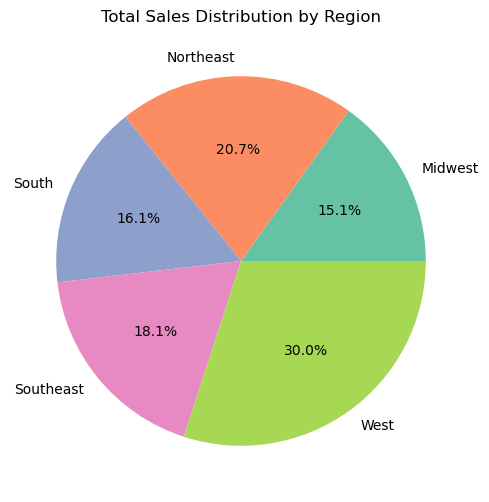

In [272]:


# a) Pie Chart: Total Sales per Region
total_sales_region = df.groupby('Region')['Total Sales'].sum()
plt.figure(figsize=(8, 6))
plt.pie(total_sales_region, labels=total_sales_region.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Total Sales Distribution by Region')
plt.savefig('total_sales_pie.png')
plt.show()
plt.close()

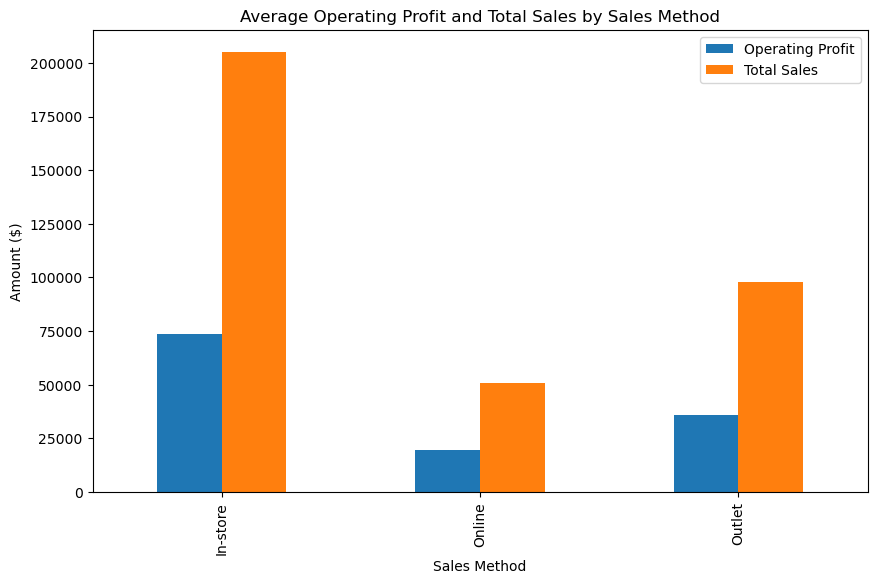

In [273]:
# b) Bar Chart: Average Operating Profit and Total Sales per Sales Method
avg_profit_sales = df.groupby('Sales Method')[['Operating Profit', 'Total Sales']].mean()
avg_profit_sales.plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Average Operating Profit and Total Sales by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Amount ($)')
plt.legend()
plt.savefig('avg_profit_sales_bar.png')
plt.show()
plt.close()


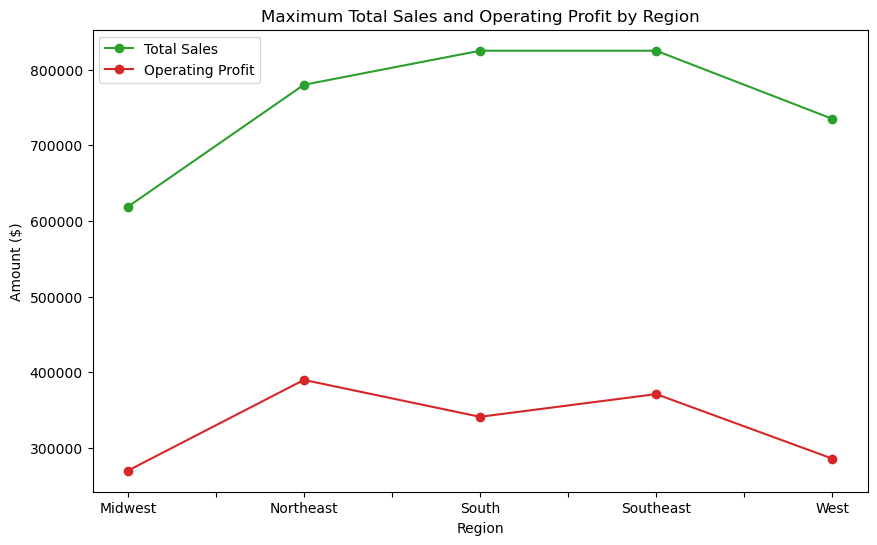

In [275]:
# c) Line Graph: Maximum Total Sales and Operating Profit per Region
max_sales_profit = df.groupby('Region')[['Total Sales', 'Operating Profit']].max()
max_sales_profit.plot(kind='line', marker='o', figsize=(10, 6), color=['#2ca02c', '#d62728'])
plt.title('Maximum Total Sales and Operating Profit by Region')
plt.xlabel('Region')
plt.ylabel('Amount ($)')
plt.legend()
plt.savefig('max_sales_profit_line.png')
plt.show()
plt.close()

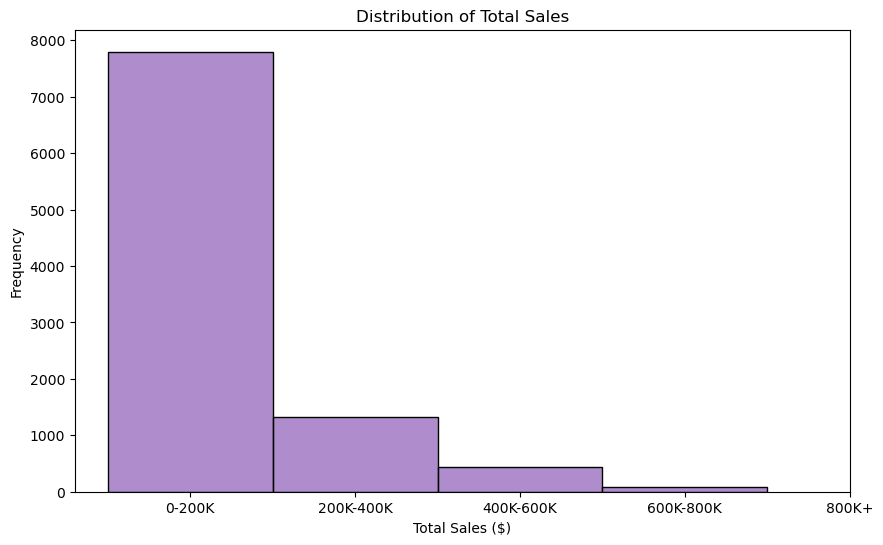

In [277]:
# d) Histogram: Distribution of Total Sales in five ranges
bins = [0, 200000, 400000, 600000, 800000, float('inf')]
labels = ['0-200K', '200K-400K', '400K-600K', '600K-800K', '800K+']
df['Sales Range'] = pd.cut(df['Total Sales'], bins=bins, labels=labels, include_lowest=True)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Total Sales', bins=bins, stat='count', color='#9467bd')
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales ($)')
plt.ylabel('Frequency')
plt.xticks(ticks=[100000, 300000, 500000, 700000, 900000], labels=labels)
plt.savefig('total_sales_histogram.png')
plt.show()
plt.close()


In [282]:

# Calculate Sales Performance Index (SPI) = Operating Profit for all Sales Methods
df['Sales Performance Index'] = df['Operating Profit']

In [284]:
# Calculate averages
avg_spi = df['Sales Performance Index'].mean()
avg_margin = df['Operating Margin'].mean()

In [286]:

# Identify last 10 days of each month
df['Day'] = df['Invoice Date'].dt.day
df['Days in Month'] = df['Invoice Date'].dt.days_in_month
df['Last 10 Days'] = df['Day'] >= (df['Days in Month'] - 10)


In [288]:
# Filter products eligible for promotion
promotion_products = df[
    (df['Sales Performance Index'] > avg_spi) &
    (df['Operating Margin'] > avg_margin) &
    (df['Last 10 Days'])
]

In [290]:
# Display eligible products
print("\nProducts Eligible for Promotion:")
print(promotion_products[['Product', 'Sales Performance Index', 'Operating Margin', 'Invoice Date', 'Sales Method']])



Products Eligible for Promotion:
                        Product  Sales Performance Index  Operating Margin  \
12        Men's Street Footwear                 305000.0              0.50   
18        Men's Street Footwear                 300000.0              0.45   
56        Men's Street Footwear                 373750.0              0.50   
73              Women's Apparel                 122500.0              0.50   
77    Women's Athletic Footwear                  98437.5              0.45   
...                         ...                      ...               ...   
1134              Men's Apparel                  40500.0              0.45   
1135            Women's Apparel                 123500.0              0.65   
1136      Men's Street Footwear                  62500.0              0.50   
1730            Women's Apparel                  60000.0              0.50   
2594            Women's Apparel                  62500.0              0.50   

     Invoice Date Sales Metho

In [296]:
# Save the cleaned dataset to the same directory as the input file
df.to_csv(r"C:\Users\DELL\Desktop\Final Data Science\cleaned_adidas_sales.csv", index=False)